<a href="https://colab.research.google.com/github/teamUBUNTU/Disease_chatbot/blob/main/Disease_bot_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from IPython.display import Image
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


Akshay

In [ ]:
cd '/gdrive/My Drive/Colab Notebooks/team_UBUNTU'

/gdrive/My Drive/colab/team_UBUNTU


Ithihas


In [ ]:
cd '/gdrive/My Drive/colab/team_UBUNTU'

In [ ]:
ls

Testing.csv  Training.csv


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Checking out the data


In [ ]:
df_train = pd.read_csv('Training.csv', delimiter=',')
df_test = pd.read_csv('Testing.csv', delimiter=',')
nRow, nCol = df_train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4920 rows and 133 columns


In [ ]:
len(df_train.columns.values.tolist())

133

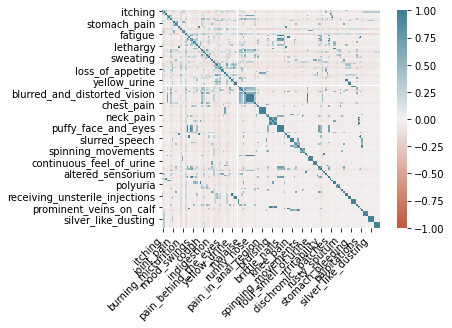

In [ ]:
# correlation matrix 

corr = df_train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# CLassificiation and encoding


In [ ]:
label = preprocessing.LabelEncoder()
label.fit(pd.concat([df_train['prognosis'], df_test['prognosis']]))
labels = label.fit_transform(df_train['prognosis'])
symptoms = df_train[df_train.columns.difference(['prognosis'])]

In [ ]:
df_train[df_train.columns.difference(['prognosis'])]

In [ ]:
model = RandomForestClassifier()
model.fit(symptoms, labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_test = df_test[df_test.columns.difference(['prognosis'])]
y_pred = model.predict(test_symptoms)


In [ ]:
y_pred

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [ ]:
le_name_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
print(le_name_mapping)

{'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


In [ ]:
key_list = list(le_name_mapping.keys()) 
val_list = list(le_name_mapping.values()) 

In [ ]:
count = 0
for i in range(len(y_pred)):
  if(key_list[y_pred[i]]==df_test['prognosis'][i]):
    count +=1
print("accuracy = " + str(count/len(y_pred)*100) + "%")
count/len(y_pred)

accouracy = 100.0%


1.0

In [ ]:
symp = input("enter your symptoms")